In [1]:
from molmap import loadmap
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm


warnings.filterwarnings("ignore")

from matplotlib.ticker import FormatStrFormatter
#gfc = gfc.rename(columns = {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'})

sns.set(style='white',  font='sans-serif', font_scale=2)  

In [2]:
dft1 = pd.read_excel('../marker_old_methods/41591_2019_406_MOESM5_ESM.xlsx', index_col='Species',
                     sheet_name='Panel_a').sort_values('-log10(q-value)', ascending=False)
dft2 = pd.read_excel('../results/feature_importance.xlsx', index_col=0)

In [3]:
dfx0 = pd.read_excel('../CRC.xlsx', sheet_name='data')
dfx0 = dfx0[dfx0.columns[1:]]
dfx =  np.log(dfx0 + 1e-8)
dfy_all = pd.read_excel('../CRC.xlsx', sheet_name='sample_info')

In [63]:
# from pandas.plotting import parallel_coordinates, andrews_curves

# top=90

# for c in dfy_all.Country.unique():
#     dfxy = dfx.join(dfy_all[['Group', 'Country']])  #, 'Country'
#     dfxy = dfxy[dfxy.Country == c]
#     from pandas.plotting import parallel_coordinates, andrews_curves

#     fig, axes = plt.subplots(nrows=2, figsize=(20, 12))

#     ax1, ax2 = axes
    
#     if c == 'CHI':
#         color = ['#fc03c2', '#0b03fc']
#     else:
#         color = ['#0b03fc', '#fc03c2']
        
#     alpha = 0.8
    
#     cols = dfxy[dft1.head(top).index].columns.to_list()
#     cols.append('Group')
#     p1  = dfxy[cols]
#     p1.columns = list(range(1, len(cols)+1))
#     parallel_coordinates(p1, class_column = len(cols),  ax= ax1, color = color,  alpha = alpha)

    
#     cols2 = dfxy[dft2.head(top).index].columns.to_list()
#     cols2.append('Group')
#     p2  = dfxy[cols2]
#     p2.columns = list(range(1, len(cols)+1))
#     parallel_coordinates(p2, class_column = len(cols2),  ax= ax2, color = color,  alpha = alpha)


#     ax1.set_title(c+ ': NM')
#     ax2.set_title(c + ': Ours')

#     ax1.set_ylabel('log10 intensity')
#     ax2.set_ylabel('log10 intensity')

#     ax1.set_ylim(-4, -1)
#     ax2.set_ylim(-4, -1)

#     ax1.set_xticks(ax2.get_xticks()[::10])
#     ax2.set_xticks(ax2.get_xticks()[::10])

#     plt.savefig('./intsy_%s.png' % c, dpi = 400, bbox_inches="tight")

In [117]:
top=10
cols2 = dfxy[dft2.head(top).index].columns.to_list()
cols1 = dfxy[dft1.head(top).index].columns.to_list()
colsc = list(set(cols2) & set(cols1))

In [118]:
len(colsc)

2

In [116]:
colsc

['Parvimonas micra [ref_mOTU_v2_1145]',
 'Fusobacterium nucleatum s. animalis [ref_mOTU_v2_0776]',
 'Prevotella nigrescens [ref_mOTU_v2_0276]',
 'Porphyromonas somerae [ref_mOTU_v2_2101]',
 'Porphyromonas uenonis [ref_mOTU_v2_4616]',
 'Prevotella intermedia [ref_mOTU_v2_0515]',
 'Fusobacterium nucleatum s. nucleatum [ref_mOTU_v2_0777]',
 'unknown Dialister [meta_mOTU_v2_5867]',
 'Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429]',
 'Solobacterium moorei [ref_mOTU_v2_0531]',
 'Porphyromonas uenonis [ref_mOTU_v2_2102]',
 'Parvimonas sp. [ref_mOTU_v2_4961]',
 'unknown Porphyromonas [meta_mOTU_v2_7656]',
 'Porphyromonas asaccharolytica [ref_mOTU_v2_1517]',
 'Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754]']

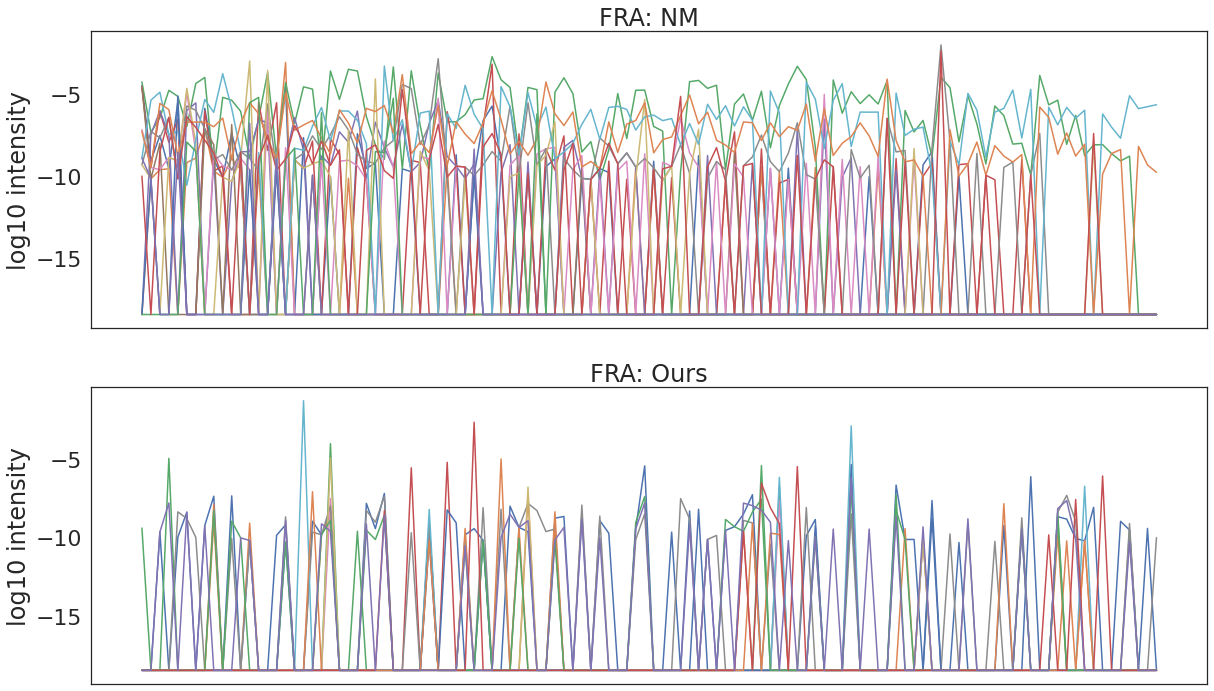

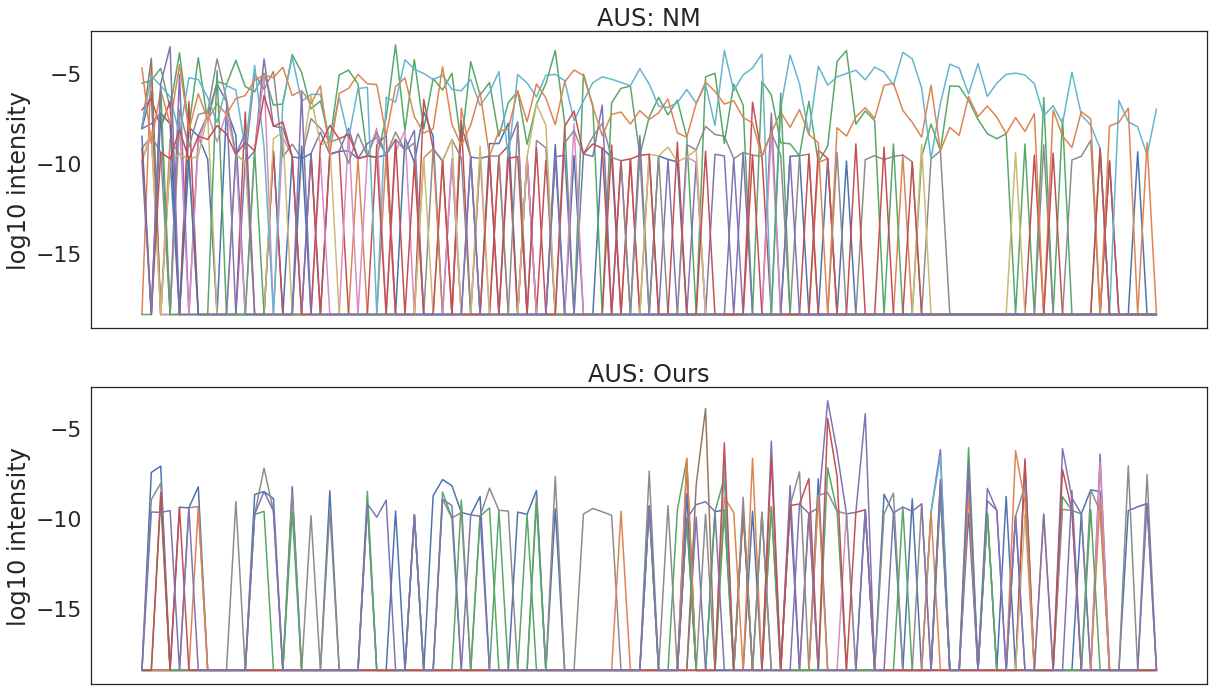

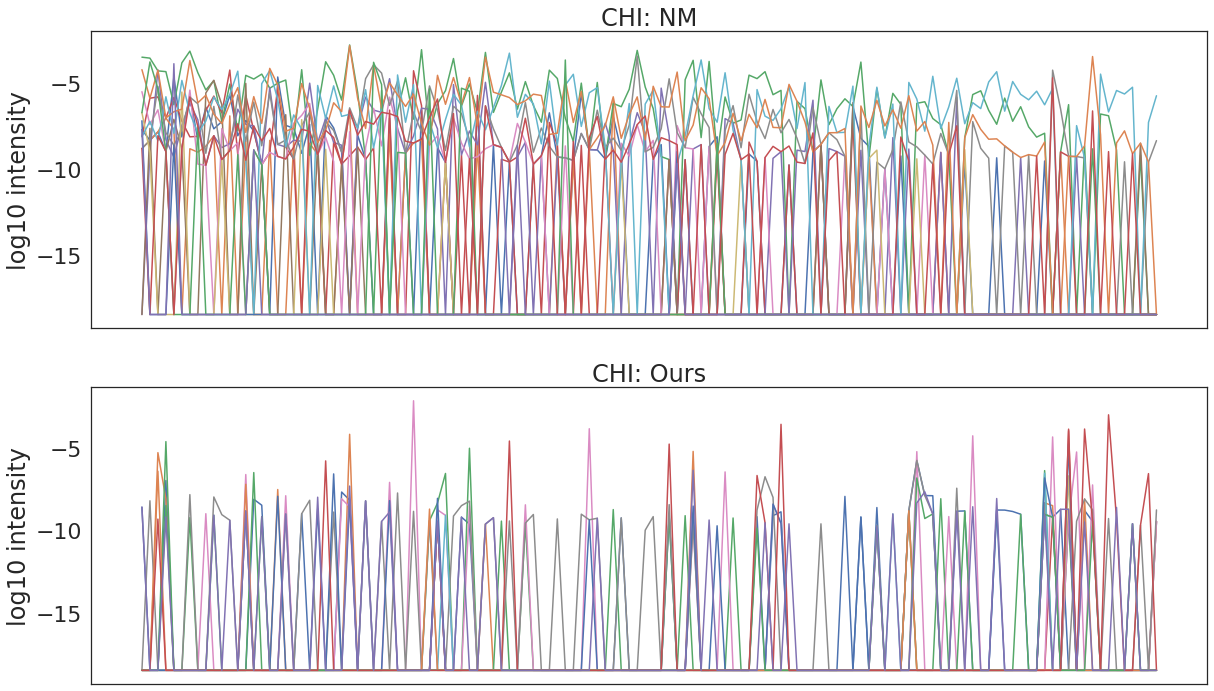

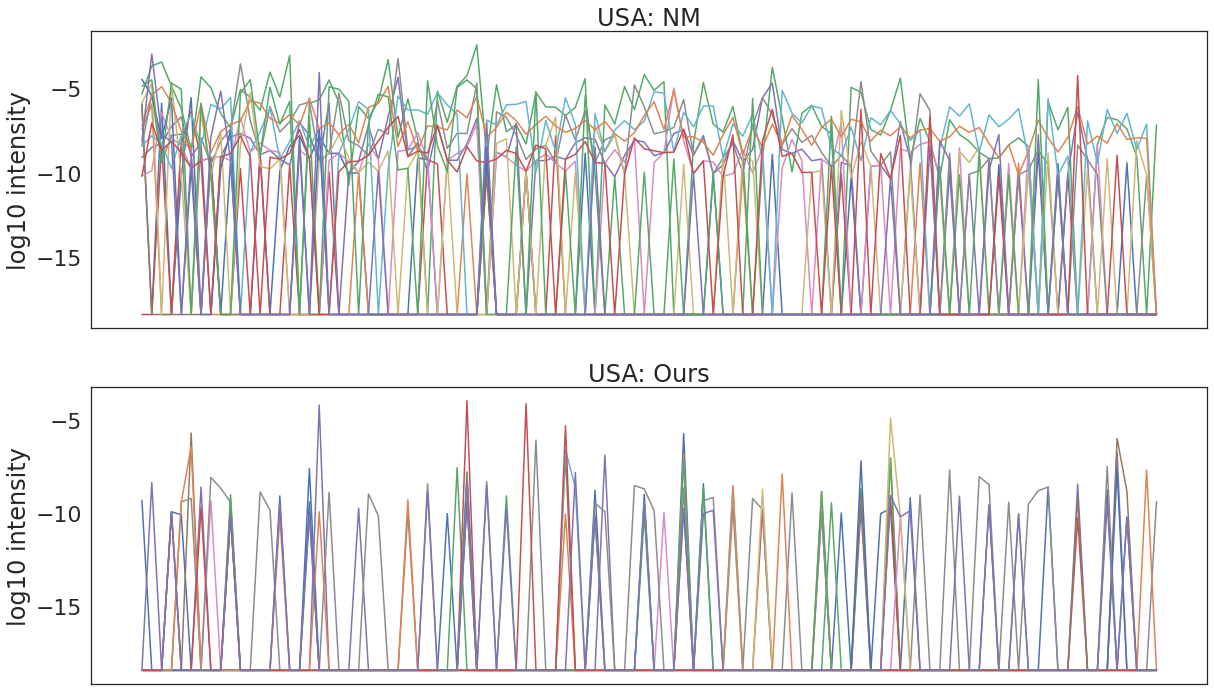

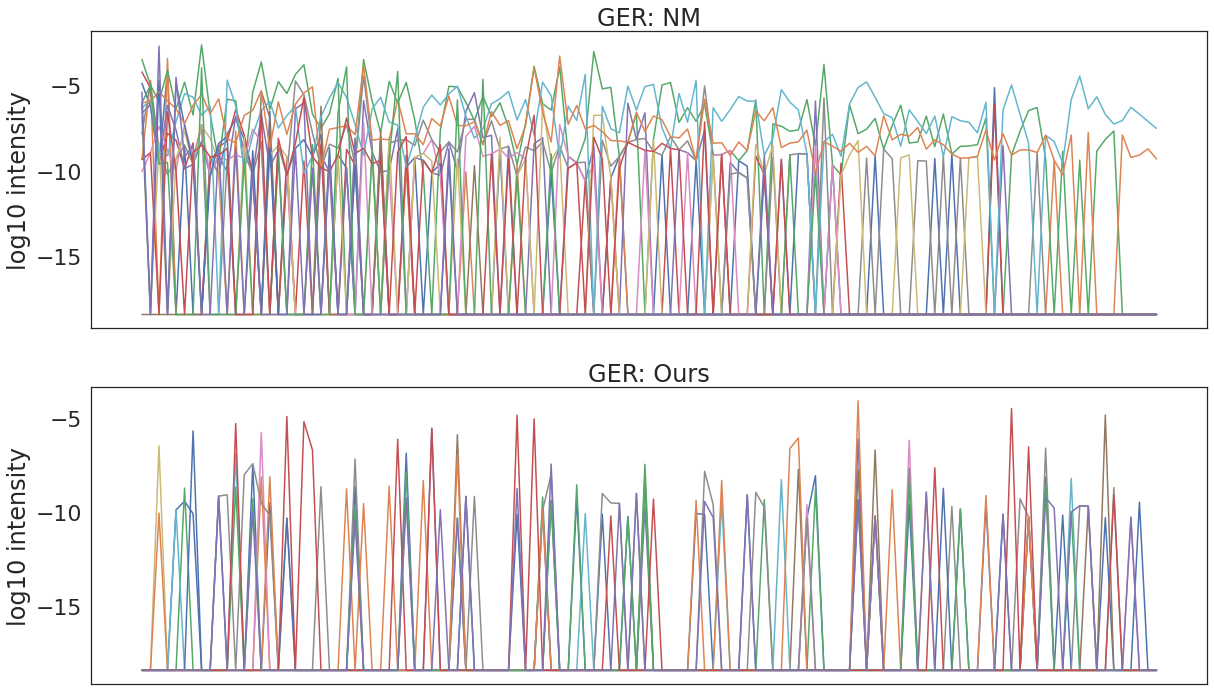

In [97]:
from pandas.plotting import parallel_coordinates, andrews_curves




def _get_fc(df):
    return df.apply(lambda x:x.unique()).apply(lambda x:np.mean(x))

for c in dfy_all.Country.unique():
    dfxy = dfx.join(dfy_all[['Group', 'Country']])  #, 'Country'
    dfxy = dfxy[dfxy.Country == c]
    from pandas.plotting import parallel_coordinates, andrews_curves

    fig, axes = plt.subplots(nrows=2, figsize=(20, 12))

    ax1, ax2 = axes

    alpha = 0.8

#     cols2 = dfxy[dft2.head(top).index].columns.to_list()
#     cols2.append('Group')
    p2  = dfxy[cols2]
    p2.index = p2.index.astype('str')
    

    p2.plot(ax=ax2, legend=False)
    
#     
#     cols1.append('Group')
    p1  = dfxy[cols1]
    p1.index = p1.index.astype('str')
    idx1 = p1.mean(axis=1).sort_values(ascending=False).index
    p1.loc[idx1].plot(ax=ax1, legend=False)
    #parallel_coordinates(p1, class_column = cols[:top],  ax= ax1,  alpha = alpha)
    
    ax1.set_title(c+ ': NM')
    ax2.set_title(c + ': Ours')

    ax1.set_ylabel('log10 intensity')
    ax2.set_ylabel('log10 intensity')

#     ax1.set_ylim(-4.1, -1)
#     ax2.set_ylim(-4.1, -1)

    ax1.set_xticks(ax2.get_xticks()[::10])
    ax2.set_xticks(ax2.get_xticks()[::10])

    #plt.savefig('./intsy_%s.png' % c, dpi = 400, bbox_inches="tight")

In [101]:
cols1 = list(set(p1.columns) & set(p2.columns))
#cols1.append('Group')

In [98]:
cols2 = list(set(p2.columns) & set(p1.columns))
cols2.append('Group')

In [107]:
p1

,Gemella morbillorum [ref_mOTU_v2_4513],unknown Peptostreptococcaceae [meta_mOTU_v2_5742],Ruminococcus torques [ref_mOTU_v2_1376],Peptostreptococcus stomatis [ref_mOTU_v2_4614],Clostridium symbiosum [ref_mOTU_v2_1475],Fusobacterium sp. oral taxon 370 [ref_mOTU_v2_1403],unknown Clostridiales [meta_mOTU_v2_6105],Clostridium boltae/clostridioforme [ref_mOTU_v2_0886],unknown Anaerotruncus [meta_mOTU_v2_6835],unknown Clostridiales [meta_mOTU_v2_6602],unknown Porphyromonas [meta_mOTU_v2_6490],Subdoligranulum sp. 4_3_54A2FAA [ref_mOTU_v2_4738],unknown Clostridiales [meta_mOTU_v2_7553],Hungatella hathewayi [ref_mOTU_v2_0882],unknown Porphyromonas [meta_mOTU_v2_5431],Group
455,-18.420681,-18.420681,-7.341931,-18.420681,-18.420681,-18.420681,-18.420681,-9.287749,-18.420681,-6.889952,-18.420681,-8.189209,-18.420681,-18.420681,-18.420681,CTR
456,-18.420681,-18.420681,-9.303721,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-7.917509,-18.420681,-7.917509,-18.420681,-18.420681,-18.420681,CTR
457,-6.232705,-4.692264,-4.970467,-5.141531,-6.147547,-18.420681,-8.940684,-4.797624,-18.420681,-5.834676,-18.420681,-5.912234,-4.983125,-8.940684,-18.420681,CRC
458,-18.420681,-18.420681,-4.772622,-18.420681,-8.785933,-18.420681,-8.498267,-8.498267,-8.498267,-7.486697,-18.420681,-5.952781,-9.191365,-8.092818,-18.420681,CRC
459,-18.420681,-18.420681,-2.621619,-18.420681,-8.262778,-18.420681,-7.307291,-7.307291,-7.387332,-6.736752,-18.420681,-5.515544,-3.961458,-8.485912,-18.420681,CRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,-18.420681,-18.420681,-7.666201,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-7.260743,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,CTR
571,-10.260526,-9.567522,-5.465019,-9.162105,-18.420681,-18.420681,-10.260526,-10.260526,-9.162105,-6.764296,-18.420681,-7.862891,-18.420681,-10.260526,-18.420681,CRC
572,-18.420681,-18.420681,-6.464971,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-8.362055,-18.420681,-8.767499,-18.420681,-18.420681,-18.420681,CTR
573,-18.420681,-18.420681,-7.462389,-18.420681,-8.560966,-18.420681,-9.254061,-8.560966,-18.420681,-5.342141,-18.420681,-7.056930,-18.420681,-9.254061,-18.420681,CTR


In [95]:
p1.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
           dtype='int64', length=114)

In [96]:
p2.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
           dtype='int64', length=114)

<AxesSubplot:>

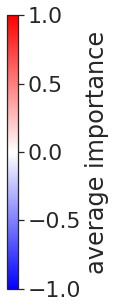

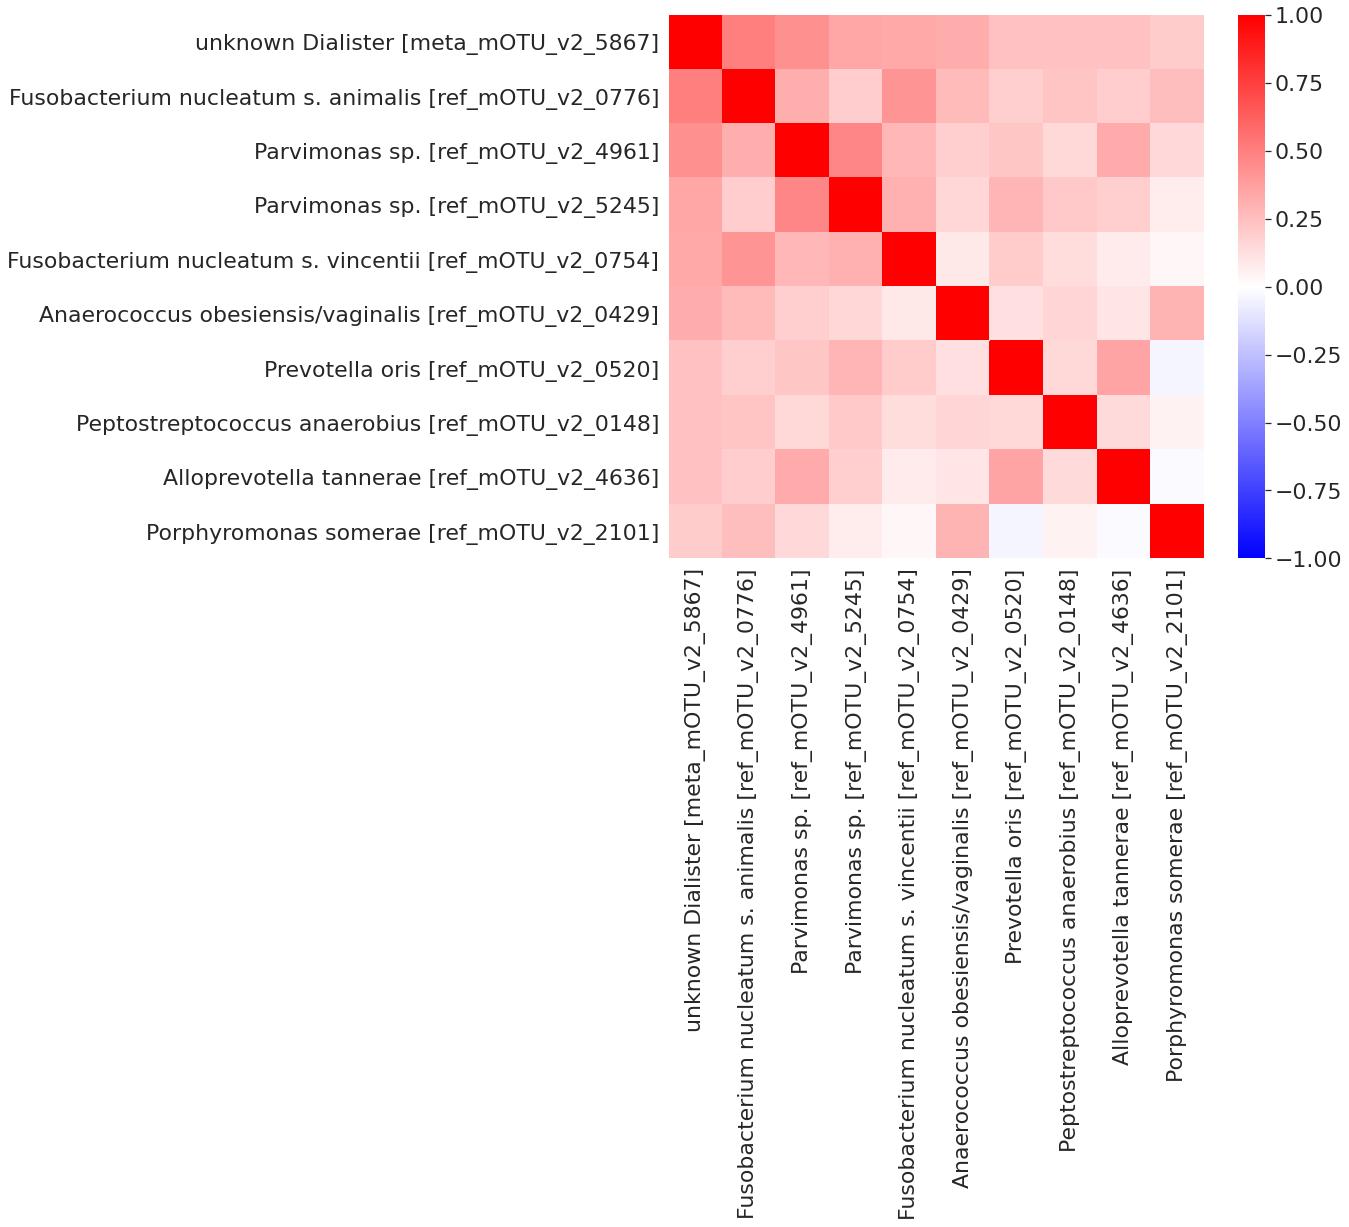

In [61]:
import matplotlib as mpl
vmin = -1 #df_map[weight].iloc[:top].min() 
vmax = 1 #df_map[weight].iloc[:top].max()

fig, ax = plt.subplots(figsize=(0.2, 10))
fig.subplots_adjust(bottom=0.5)


norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["blue", "white","red"], N = 1000, gamma = 1.0)
#cmap = mpl.cm.cool

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm, #orientation='horizontal'
                                )
cb1.set_label('average importance')
fig.show()


idx = dfy_all[dfy_all.Country == 'FRA'].index
corr = dfx[dft2.head(10).index].corr()

idx = corr.sort_values('unknown Dialister [meta_mOTU_v2_5867]', ascending=False).index

corr = corr[idx].loc[idx]
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, ax = ax, vmin=-1, cmap=cmap)

<AxesSubplot:>

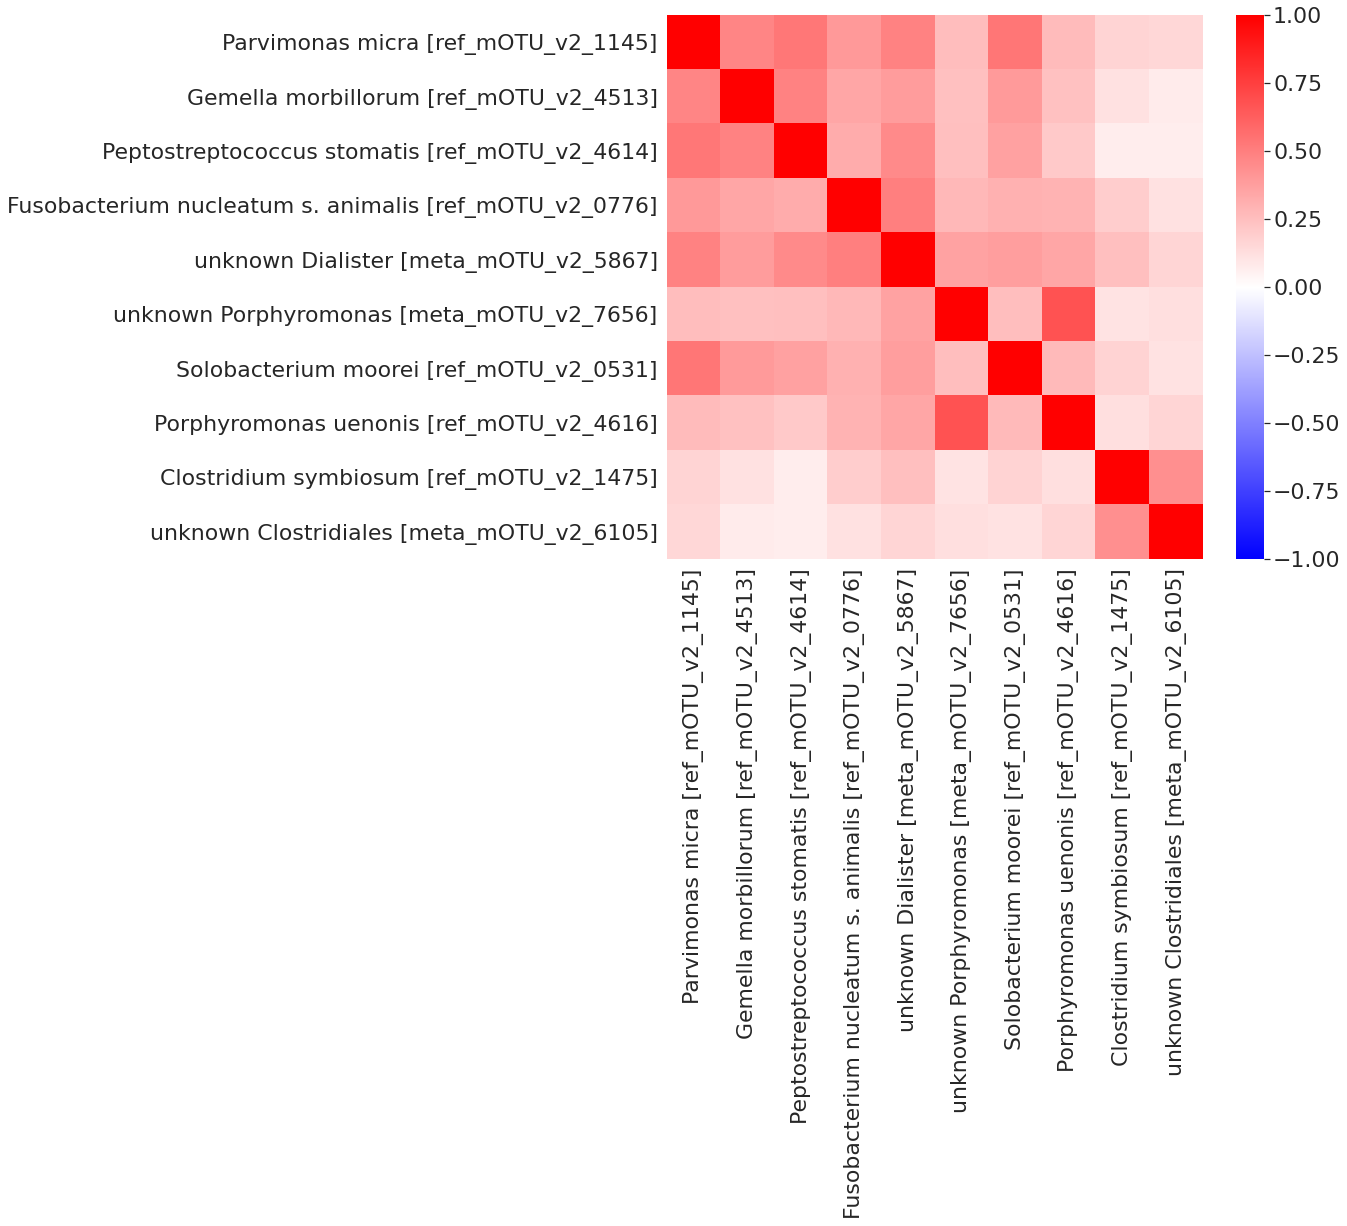

In [62]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(dfx[dft1.head(10).index].corr(), ax = ax, vmin=-1, cmap=cmap)

In [33]:
dfx

,Clostridium saccharogumia [ref_mOTU_v2_0473],Clostridium innocuum [ref_mOTU_v2_0643],Clostridium sp. KLE 1755 [ref_mOTU_v2_0860],Clostridium scindens [ref_mOTU_v2_0883],Clostridium boltae/clostridioforme [ref_mOTU_v2_0886],Clostridium butyricum [ref_mOTU_v2_0978],Clostridium clostridioforme [ref_mOTU_v2_0979],Clostridium clostridioforme [ref_mOTU_v2_0980],Clostridium perfringens [ref_mOTU_v2_1117],Clostridium saccharolyticum [ref_mOTU_v2_1380],...,unknown Tyzzerella [meta_mOTU_v2_7425],unknown Veillonella [meta_mOTU_v2_5811],unknown Veillonellaceae [meta_mOTU_v2_6765],unknown Veillonellaceae [meta_mOTU_v2_6915],unknown Verrucomicrobia [meta_mOTU_v2_6061],Veillonella atypica [ref_mOTU_v2_0561],Veillonella dispar [ref_mOTU_v2_4469],Veillonella parvula [ref_mOTU_v2_1042],Veillonella sp. [ref_mOTU_v2_5068],Verrucomicrobia bacterium CAG:312_58_20 [meta_mOTU_v2_6090]
0,-9.379543,-18.420681,-9.379543,-8.974117,-9.379543,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,...,-18.420681,-10.072571,-18.420681,-18.420681,-18.420681,-9.379543,-18.420681,-9.379543,-18.420681,-18.420681
1,-18.420681,-18.420681,-18.420681,-18.420681,-8.591690,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-7.205436,-18.420681,-18.420681
2,-18.420681,-9.631756,-9.226342,-9.631756,-9.226342,-18.420681,-18.420681,-18.420681,-8.938685,-18.420681,...,-18.420681,-8.379102,-18.420681,-18.420681,-18.420681,-8.938685,-9.226342,-8.938685,-8.715557,-18.420681
3,-5.993957,-18.420681,-18.420681,-18.420681,-7.092562,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-7.785697,-7.785697,-6.687101,-7.092562,-18.420681
4,-18.420681,-8.172694,-8.865805,-9.271235,-8.355008,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-9.964276,-18.420681,-18.420681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,...,-7.666201,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681
571,-18.420681,-18.420681,-18.420681,-18.420681,-10.260526,-18.420681,-18.420681,-18.420681,-18.420681,-8.651317,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-9.567522,-18.420681,-18.420681,-18.420681,-18.420681
572,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-7.158112,...,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681
573,-8.155519,-9.254061,-9.254061,-9.254061,-8.560966,-18.420681,-18.420681,-18.420681,-18.420681,-8.560966,...,-18.420681,-9.254061,-18.420681,-18.420681,-18.420681,-18.420681,-18.420681,-9.254061,-18.420681,-18.420681
